In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### Importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test  = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Images : collection of pixels
* Our dataset has 784 pixels = 28*28

In [6]:
train.shape

(42000, 785)

There are 42000 images of different digits

In [7]:
test.shape

(28000, 784)

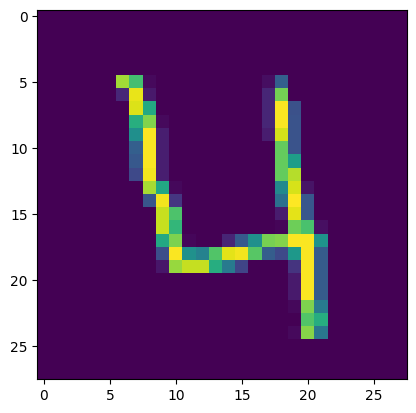

In [8]:
# Converting array into 2-D matrix that can be shown in the form of image
# Taking 3rd row and all columns (pixel values) except label
num = np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(num)

### Images in Python
An image can be classified into:
1. RBG (coloured)
2. GrayScale (Black & white)

0 - 255 : 256 integers : 2^8 
Virtually any colour can be represented as a combination of red, greed, blue with different intensity (proportions in the range of 0 to 255)

Suppose, R G B => 3 channels
* If a 28* 28 pixel size image is viewed in python its size will be 28 * 28 * 3

* In a greyscale image, there would be only one channel : Its size in python would be 28* 28. Any pixel can assume a value from 0 to 255 where 0 : Complete white and 255 : complete black


In [9]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

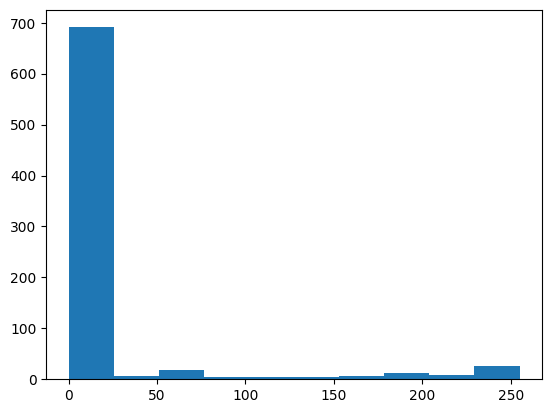

In [10]:
# Values are in the range of 0 to 255
plt.hist(arr) 

In [11]:
max(arr)

255

### Finding missing values in the dataset

In [12]:
missing_val_count = train.isnull().sum()
missing_val_count

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### Feature Engineering in Images
1. Create new images by rotating, sheering (tilting the image by keeping the axis same), shifting, zoom, change the height
2. By using Keras library, with function ImageDataGenerator : Takes input in the form of (a,x,y,z)

x.shape = (a,x,y,z) = (42000,784) -> Reshape it into (42000,28,28,1) before feeding into ImageDataGenerator


In [13]:
x = np.array(train)
y = np.array(test)
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

In [14]:
from keras.preprocessing.image import ImageDataGenerator
# While reshaping a numpy array when we input -1, numpy will automatically figure out which value to put in there
X_train = X_train.reshape(-1,28,28,1)

In [15]:
datagen = ImageDataGenerator(
    # how much you want to rotate the image in degrees
    rotation_range =15,
    height_shift_range = 0.1,
    shear_range = 0.1
)
datagen.fit(X_train)

In [16]:
# Reshaping X_train to original values
X_train = X_train.reshape(-1,784)

### Implementing KNN Algorithm

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [18]:
knn.predict(X_test[100].reshape(1,-1))

array([0])

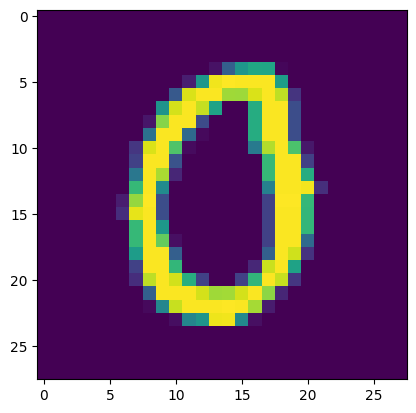

In [19]:
num = np.array(test.iloc[100,:]).reshape(28,28)
plt.imshow(num)